In [3]:
from google.colab import drive
drive.unmount('/content/drive')

AttributeError: ignored

In [2]:
#Run this
#!pip install albumentations > /dev/null
#!pip install -U efficientnet==0.0.4
!pip install keras_efficientnets
#%tensorflow_version 1.x
import numpy as np
import pandas as pd
import gc
import keras

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split,StratifiedKFold

from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization, Multiply, Subtract, AveragePooling2D
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils, plot_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil
import os
import random
from PIL import Image

seed = 10
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

#tf.set_random_seed(seed)
    
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.2.0


In [ ]:
# #Run this
# def unet(input_size=(256,256,3)):
#     inputs = Input(input_size)
    
    
# # encoder
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

#     conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
#     conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

#     conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
#     conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
# #middle
#     conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
#     conv5 = Conv2D(512, (3, 3), activation='relu', padding='same', name = 'up5')(conv5)
# # decoder
#     up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
#     conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
#     conv6 = Conv2D(256, (3, 3), activation='relu', padding='same', name = 'up6')(conv6)

#     up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
#     conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
#     conv7 = Conv2D(128, (3, 3), activation='relu', padding='same', name = 'up7')(conv7)

#     up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
#     conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
#     conv8 = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'up8')(conv8)

#     up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
#     conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
#     conv9 = Conv2D(32, (3, 3), activation='relu', padding='same', name = 'up9')(conv9)

#     conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

#     return Model(inputs=[inputs], outputs=[conv10])

# unet = unet()
# unet.load_weights("/content/drive/My Drive/CT_SCAN_SARS-COV_2/h5s/Copy of m_unet_light_lr1.5e_3_jahin_rpp.h5")

ValueError: ignored

In [ ]:
# unet.summary()

In [ ]:
# from efficientnet import EfficientNetB4



# backbone = EfficientNetB4(weights='imagenet',
#                           include_top=False,
#                           input_shape=(256, 256, 3))



In [ ]:
# a= backbone.layers[44].output
# print(a.shape)

In [ ]:
# #Run this
# for layer in unet.layers:
# 	layer.trainable = False

In [ ]:
# out = unet.get_layer("up7").output
# model_cut_right = Model(inputs = unet.input, outputs = out)
# model_cut_right.summary()

# out = unet.get_layer("middle_point").output
# model_cut_en = Model(inputs = unet.input, outputs = out)
# #model_cut_en.summary()

# out = backbone.layers[60].output
# model_eff = Model(inputs = backbone.input, outputs = out)

# for layer in model_eff.layers:
# 	layer.trainable = False

# model_eff.summary()



# #plot_model(model_eff)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 32) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [ ]:
# def volume_feature_map(in_shape , filter0=256):
#     x_in_0 = Input(in_shape)
#     slice_num= x_in_0.shape[-1]
#     print(x_in_0.shape)
#     x_in = Reshape((256, 256, 3, slice_num))(x_in_0)
    
#     branch = []
#     for i in range(slice_num):
#         x_out = Lambda(lambda x: x[:,:,:,:,i])(x_in)  
#         x_out_1 = model_eff(x_out)
#         x_out_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_out_1)
        

#         x_out_2 = model_cut_right(x_out)
#         x_out_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_out_2)
#         print(x_out_1.shape)
#         print(x_out_2.shape)

#         #while x_out_1.shape[1]!=x_out_2.shape[1]:
#             #x_out_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(UpSampling2D((2,2))(x_out_1))

#         #x_out_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_out_1)
#         #x_out_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_out_2)
#         x_out_3 = concatenate([x_out_1, x_out_2], axis=-1)
        
#         print(x_out_1.shape)
#         print(x_out_2.shape)
#         branch.append(x_out_3)
#         print(i)
#         #if i==0: break
        
    
#     x = Concatenate(axis=-1)(branch)
    
#     def just_conv(new_in, filter, ker):
#         new_in =  Conv2D(filter, (ker, ker), activation='relu', padding='same')(new_in)
#         #new_in = BatchNormalization()(new_in)
#         return new_in

#     def jump_add(new_in, mode, filter):
#         if mode==0:
#           new_in_1 = just_conv(new_in, filter, 3)
        
#         elif mode==1:
#           new_in_1 = just_conv(new_in,filter,  3)
#           new_in_2 = just_conv(new_in_1, filter, 3)
#           new_in_2 = just_conv(new_in_2, filter, 3)
            
#           new_in_1 = Add()([new_in_1, new_in_2])

#         elif mode==2:
#           new_in_1 = just_conv(new_in, filter, 3)
#           new_in_2 = just_conv(new_in_1, filter, 3)
#           new_in_2 = just_conv(new_in_2, filter,  3)

#           new_in_3 = just_conv(new_in_1, filter, 1)
#           new_in_3 = just_conv(new_in_3, filter, 1)
#           new_in_1 = Add()([new_in_1, new_in_2, new_in_3])

#         return new_in_1

#     def jump_con(new_in, mode, filter):
#         if mode==0:
#           new_in_1 = just_conv(new_in, filter, 3)
        
#         elif mode==1:
#           new_in_1 = just_conv(new_in,filter,  3)
#           new_in_2 = just_conv(new_in_1, filter, 3)
#           new_in_2 = just_conv(new_in_2, filter, 3)
            
#           new_in_1 = concatenate([new_in_1, new_in_2], axis=-1)

#         elif mode==2:
#           new_in_1 = just_conv(new_in, filter, 3)
#           new_in_2 = just_conv(new_in_1, filter, 3)
#           new_in_2 = just_conv(new_in_2, filter,  3)

#           new_in_3 = just_conv(new_in_1, filter, 1)
#           new_in_3 = just_conv(new_in_3, filter, 1)
#           new_in_1 = concatenate([new_in_1, new_in_2, new_in_3], axis=-1)

#         return new_in_1
    
    

#     x = jump_add(x, mode= 0, filter = int(filter0))

#     """
#     #com_1
#     x2=x
#     x = jump_add(x, mode= 0, filter = int(filter0/2))
#     x = jump_con(x, mode= 2, filter = int(filter0/2))
#     x = jump_con(x, mode= 2, filter = int(filter0/4))
#     x = concatenate([x, x2], axis=-1)
#     #com_1
  

#     #com_2 

#     x2 = jump_add(x, mode= 0, filter = int(filter0/2))
#     x2 = jump_con(x2, mode= 1, filter = int(filter0/2))
#     x2 = jump_con(x2, mode= 1, filter = int(filter0/4))
#     x = concatenate([x, x2], axis=-1)

#     #com_2
#   """


#     x = GlobalAveragePooling2D()(x)    
#     x = LeakyReLU(alpha=0.1) (x)
#     x = Dropout(0.1)(x)
#     x = Dense(128, activation='relu')(x)  
#     x = Dense(64, activation='relu')(x)
#     x = Dense(1, activation='sigmoid')(x)
    
#     model = Model(x_in_0, x)
    
    
#     return model

In [ ]:
# model_appended=volume_feature_map((256, 256, 3, 30), filter0=256) 

In [ ]:
# model_appended.summary()

In [ ]:
# plot_model(model_appended,
#     to_file="model_appended.png")

In [ ]:
# #Run this
# im_dir = "/content/drive/My Drive/CT_SCAN_SARS-COV_2_datasets/dataset/CLASSIFIER_PATIENT_WISE/train"
# a1 = os.path.join(im_dir, os.listdir(im_dir)[0])
# a2 = os.path.join(im_dir, os.listdir(im_dir)[1])
# bunches = 300
# patients = len(os.listdir(a1))+len(os.listdir(a2))


# #Run this
# init = 0  #don't exceed 5
# bunch_1= bunches/2
# bunch_0= bunches/2

# if (len(os.listdir(a1))-bunch_1*(init+1)) <2: 
#   rest1 = int(len(os.listdir(a1))-bunch_1*(init+1))
# else :
#   rest1 = 0

# if (len(os.listdir(a2))-bunch_0*(init+1)) <2: 
#   rest2 = int(len(os.listdir(a2))-bunch_0*(init+1))
# else :
#   rest2 = 0

# X = np.empty((bunches+rest1+rest2, 256, 256, 3, 30), dtype= np.float64)
# Y = np.empty((bunches+rest1+rest2), dtype= int)

# X.shape


(300, 256, 256, 3, 30)

In [ ]:
# #mak I
# from keras.callbacks import *

# model_appended.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# weight_saver = ModelCheckpoint('Jahin_2_0_decoder_eff_frozen.h5', monitor='accuracy', 
#                                 save_best_only=True, save_weights_only=True)
# annealer = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
#                               patience=5, min_lr=0.0001)
# hist = model_appended.fit(x = X , 
#                           y = Y, 
#                           batch_size = 2,
#                           epochs = 40,
#                           callbacks = [weight_saver , annealer],
#                           validation_split = 0.2,
#                           shuffle = False,
#                           verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [ ]:
# model_appended.predict(X[28:29])

array([[1.7282919e-07]], dtype=float32)

In [ ]:
# Y[28]


0

In [ ]:
# X.shape

(300, 256, 256, 3, 30)

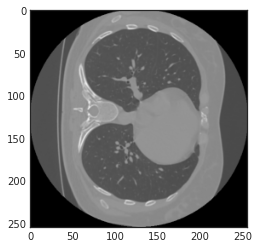

In [ ]:
# plt.imshow (X[270,:,:,:,13])

In [ ]:
import numpy as np
bunch = 45*4
X = np.empty((bunch, 256, 256, 3, 29) , dtype = np.float64)
Y = np.empty(bunch, dtype = int)

In [ ]:
ct0 = '/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/SEVERITY/CT 0'
ct1 = '/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/SEVERITY/CT 1'
ct2 = '/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/SEVERITY/CT 2'
ct3 = '/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/SEVERITY/CT 3'

In [ ]:
# CELL 1
print(bunch/4)
import cv2
for i in range(int(bunch/4)):
  a0_1 = os.path.join (ct0 , os.listdir(ct0)[i]) #patient
  a0_1_1 = np.sort(random.sample(os.listdir(a0_1), 29)) # slice
  for j in a0_1_1:
    a011_img = os.path.join(a0_1, a0_1_1[j])
    a011_img = cv2.imread(a011_img)
    a011_img = resize(a011_img, (256, 256,3), anti_aliasing=True)
    X[i, :,:,: ,j] = a011_img
    print("patient : " + str(j) + " slice : " +str(i))
    Y[j] = 0

45.0


TypeError: ignored

In [ ]:
# CELL 2
for i in range(bunch/4, 2*bunch/4):
  a0_1 = os.path.join (ct1 , os.listdir(ct1)[i - bunch/4]) #patient
  a0_1_1 = np.sort(random.sample(os.listdir(a0_1), 29)) # slice
  for j in range (a0_1_1):
    a011_img = os.path.join(a0_1, a0_1_1[j])
    a011_img = cv2.imread(a011_img)
    a011_img = resize(a011_img, (256, 256,3), anti_aliasing=True)
    X[i, :,:,: ,j] = a011_img
    print("patient : " + str(i) + " slice : " +str(j))
    Y[i] = 1

In [ ]:
#CELL 3
for i in range(2*bunch/4, 3*bunch/4):
  a0_1 = os.path.join (ct2 , os.listdir(ct2)[i - 2*bunch/4]) #patient
  a0_1_1 = np.sort(random.sample(os.listdir(a0_1), 29)) # slice
  for j in range (a0_1_1):
    a011_img = os.path.join(a0_1, a0_1_1[j])
    a011_img = cv2.imread(a011_img)
    a011_img = resize(a011_img, (256, 256,3), anti_aliasing=True)
    X[i, :,:,: ,j] = a011_img
    print("patient : " + str(i) + " slice : " +str(j))
    Y[i] = 2

In [ ]:
#cell 4
for i in range(3*bunch/4, 4*bunch/4):
  a0_1 = os.path.join (ct3 , os.listdir(ct3)[i - 3*bunch/4]) #patient
  a0_1_1 = np.sort(random.sample(os.listdir(a0_1), 29)) # slice
  for j in range (a0_1_1):
    a011_img = os.path.join(a0_1, a0_1_1[j])
    a011_img = cv2.imread(a011_img)
    a011_img = resize(a011_img, (256, 256,3), anti_aliasing=True)
    X[i, :,:,: ,j] = a011_img
    print("patient : " + str(i) + " slice : " +str(j))
    Y[i] = 3

In [ ]:
def jahin_activation(x):
    return (1. / (1. + K.exp(5*(x-0.5))))

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)


In [ ]:
def mse_block(x_input):  # this block takes a block of input shape (256, 256, nb_channels) )(256,256, 64)
  x_in1 = GlobalAveragePooling2D()(x_input)
  x_in1 = Dense(int(x_input.shape[-1]//4) , activation = 'relu')(x_in1)
  x_in1 = Dense(int(x_input.shape[-1]), activation = 'sigmoid')(x_in1)
  s1 = Multiply()([x_in1 , x_input])

  x_in2 = Conv2D(filters = int(x_input.shape[-1]), kernel_size = (3,3), strides = (2,2), padding = 'same')(x_input)
  x_in2 = Conv2DTranspose (filters = 1, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'sigmoid')(x_in2)
  s2 = Multiply()([x_in2 , x_input])
  
  #s1_0 =  Dense(int(x_input.shape[-1]), activation = jahin_activation)(x_in1)
  #s1_0 =  Multiply()([s1_0 , x_input])
  #s1_0 =  Conv2D(filters = int(x_input.shape[-1]), kernel_size = (1,1), strides = (1,1), padding = 'same', activation= 'relu')(s1_0)
    
  s2_0 =  Conv2D(filters = int(x_input.shape[-1]), kernel_size = (3,3), strides = (1,1), padding = 'same', activation= jahin_activation)(x_in2)
  s2_0 =  Multiply()([s2_0 , x_input])
  s2_0 =  Conv2D(filters = int(x_input.shape[-1]), kernel_size = (1,1), strides = (1,1), padding = 'same', activation= 'relu')(s2_0)
  
  #s12_0 = Concatenate() ([s1_0, s2_0])
  #s12_0 = Conv2D (filters = int(x_input.shape[-1]), kernel_size = (1,1),strides = (1,1), padding = 'same' , activation = 'relu')(s12_0)
  out = Concatenate() ([s1, s2])
  out = Conv2D (filters = int(x_input.shape[-1]), kernel_size = (1,1),strides = (1,1), padding = 'same' , activation = 'relu')(out)
  out = Add()([out , x_input])
  #out = Subtract()([out, s2_0])
  
  return out


In [ ]:
def PYRAMID(x_input): # number of channels should be power of 2
  

  track_1 = Conv2D(filters = int(x_input.shape[-1]//4), kernel_size=(1, 1), strides=1, padding='same', kernel_regularizer=l2(1e-3))(x_input)

  track_2 = AveragePooling2D(pool_size=(2, 2) , strides=2, padding = 'same')(x_input)
  track_2 = Conv2D(filters = int(x_input.shape[-1]//4), kernel_size=(1, 1), strides=1, padding='same', kernel_regularizer=l2(1e-3))(track_2)
  track_2 = UpSampling2D((2,2))(track_2)
  #print(track_2.shape)

  track_3 = AveragePooling2D(pool_size=(4, 4) , strides=4, padding = 'same')(x_input)
  track_3 = Conv2D(filters = int(x_input.shape[-1]//4), kernel_size=(1, 1), strides=1, padding='same', kernel_regularizer=l2(1e-3))(track_3)
  track_3 = UpSampling2D((4,4))(track_3)
  #print(track_3.shape)

  track_4 = AveragePooling2D(pool_size=(8, 8) , strides=8 , padding = 'same')(x_input)
  track_4 = Conv2D(filters = int(x_input.shape[-1]//4), kernel_size=(1, 1), strides=1, padding='same', kernel_regularizer=l2(1e-3))(track_4)
  track_4 = UpSampling2D((8,8))(track_4)
  #print(track_4.shape)

  x_out_1 = Concatenate(axis = -1)([track_1, track_2 , track_3, track_4, x_input])
  

  x_out_1 = Conv2D(filters = int(x_out_1.shape[-1]//2), kernel_size=(1, 1), strides=1, padding='same', kernel_regularizer=l2(1e-3))(x_out_1)
  x_out_1 = Add()([x_input , x_out_1])
  return x_out_1

In [ ]:
from keras_efficientnets import EfficientNetB5

backbone = EfficientNetB5(weights='imagenet',
                          include_top=False,
                          input_shape=(256, 256, 3))

backbone = Model(backbone.input, backbone.layers[515].output)
backbone.summary()

115302400/115295288 [==============================] - 2s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 128, 128, 48) 1296        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 48) 192         conv2d_43[0][0]                  
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 128, 128, 48) 0           batch_normalization_1[0][0]      
_________________________

In [ ]:
#To train/load ... to train, comment last line
def M_unet(backbone, heavier=0):
  a1 = backbone.layers[41].output   #128x128x144       |
  a2 = backbone.layers[115].output  #64x64x240         |
  a3 = backbone.layers[189].output  #32x32x384         |    <--encoder
  a4 = backbone.layers[397].output  #16x16x1056        |
  a5 = backbone.layers[-1].output   #8x8x1824          |


  
  def just_conv(x, filter_, ker=3, up=0):
      if up:  x= UpSampling2D((2,2))(x)
      x = Conv2D(filter_, (ker,ker), activation='relu', padding='same')(x)
      return x

  factor=1
  if heavier: factor=2

  a10 = just_conv(a1, 16*factor, up=1)
  a20 = just_conv(a2, 32*factor, up=1)
  a30 = just_conv(a3, 64*factor, up=1)
  a40 = just_conv(a4, 128*factor, up=1)
  a50 = just_conv(a5, 256*factor, up=1)


  a10 = mse_block(PYRAMID(a10))
  a20 = mse_block(PYRAMID(a20))
  a30 = mse_block(PYRAMID(a30))
  a40 = mse_block(PYRAMID(a40))
  a50 = mse_block(PYRAMID(a50))
  
  b6 = just_conv(a5, 256*factor)                                    #           |            
  b6 = just_conv(b6, 256*factor, up=1)

  b5 = concatenate([b6,a50], axis=-1)                               #           |
  b5 = just_conv(b5, 256*factor)
  b5 = just_conv(b5, 256*factor)

  b4 = concatenate([just_conv(b5, 256*factor, up=1), a40], axis=-1) #           |
  b4 = just_conv(b4, 128*factor)
  b4 = just_conv(b4, 128*factor)

  b3 = concatenate([just_conv(b4, 128*factor, up=1), a30], axis=-1) #           |  <--decoder
  b3 = just_conv(b3, 64*factor)
  b3 = just_conv(b3, 64*factor)

  b2 = concatenate([just_conv(b3, 64*factor, up=1), a20], axis=-1)  #           |
  b2 = just_conv(b2, 32*factor)
  b2 = just_conv(b2, 32*factor)

  b1 = concatenate([just_conv(b2, 32*factor, up=1), a10], axis=-1)  #           |
  b1 = just_conv(b1, 16*factor)
  b1 = just_conv(b1, 16*factor)                                     #           |

  out = Conv2D(1, (1, 1), activation='sigmoid')(b1)

  model= Model(backbone.input, out)

  #print(b5.shape)
  #print(b4.shape)
  #print(b3.shape)
  #print(b2.shape)
  #print(b1.shape)
  return model



m_unet= M_unet(backbone,0)
m_unet.compile(optimizer=Adam(lr=1.5e-3), loss='binary_crossentropy', metrics=[dice_coef])
m_unet.load_weights ('/content/drive/My Drive/CT_SCAN_SARS-COV_2/h5s/Copy of m_unet_light_lr1.5e_3_jahin_rpp.h5')   #m_unet_light_lr1.5e_3_jahin_rpp.h5 == 90.36% 

In [ ]:
m_unet.summary()


Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 128, 128, 48) 1296        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 48) 192         conv2d_43[0][0]                  
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 128, 128, 48) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
a = m_unet.layers[-2].output
b = m_unet.layers[-10].output
c = m_unet.layers[-26].output
d = m_unet.layers[-54].output
e = m_unet.layers[-84].output

print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)
print(e.shape)


(None, 256, 256, 16)
(None, 128, 128, 32)
(None, 64, 64, 64)
(None, 32, 32, 128)
(None, 16, 16, 256)


In [ ]:
for layer in m_unet.layers:
	layer.trainable = False

In [ ]:
temp_model = Model (inputs = m_unet.input, outputs = [e, d, c, b, a] )
temp_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 48) 192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 128, 128, 48) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
def m_attention_block(slice_x):
        basket=[]
        y = temp_model(slice_x)
        for i in range(0,5):
          #name = "up"+str(i)
          #out = unet.get_layer(name).output
          #temp_model = Model(inputs = unet.input, outputs = out)
          x = mse_block(y[i])          
          #x = Add()([x, x2])

          x = Conv2D(64, (1,1), activation= "relu", padding="same")(x)
          

          while x.shape[1]!= 256: x= UpSampling2D((2,2))(x)
          x = Conv2D(3, (3,3), activation= "sigmoid", padding="same")(x)
          x = Multiply()([slice_x, x])
          
          #x = model_vgg(x)
          #x = Conv2D(64, (1,1), activation= "relu", padding="same")(x)
          basket.append(x)
        x = Concatenate(axis=-1)(basket)

        
        return x


x0 = Input((256,256,3))
y0 = m_attention_block(x0)

m_attention = Model(x0,y0)

In [ ]:
def m_feature_extractor_block(slice_x):
        basket=[]
        y = temp_model(slice_x)
        for i in range(0,5):
          #name = "up"+str(i)
          #out = unet.get_layer(name).output
          #temp_model = Model(inputs = unet.input, outputs = out)
          x = PYRAMID(y[i])
          x = mse_block(x)          
          #x = Add()([x, x2])

          x = Conv2D(16, (1,1), activation= "relu", padding="same")(x)
          

          while x.shape[1]!= 256: x= UpSampling2D((2,2))(x)
          #x = Conv2D(3, (3,3), activation= "sigmoid", padding="same")(x)
          #x = Multiply()([slice_x, x])
          
          #x = model_vgg(x)
          #x = Conv2D(64, (1,1), activation= "relu", padding="same")(x)
          basket.append(x)
        
        x = Concatenate(axis=-1)(basket)
        
        return x


x1 = Input((256,256,3))
y1 = m_feature_extractor_block(x1)

m_feat_ex = Model(x1,y1)

In [ ]:
#Run this
from keras.layers import Multiply


def approach_1_block(in_shape):
    x_in = Input(in_shape)
    slice_num= x_in.shape[-1]
    
    branch = []
    
    """
    def s_e_block(in_block):
        x = GlobalAveragePooling2D()(in_block)
        x = Dense(int(in_block.shape[-1]//2), activation='relu')(x)
        x = Dense(int(in_block.shape[-1]), activation='sigmoid')(x)
        return Multiply()([in_block, x])
    
    
    def attention_block(slice_x, name_val):
        basket=[]
        for i in range(5,10):
          name = "up"+str(i)
          out = unet.get_layer(name).output
          
          temp_model = Model(inputs = unet.input, outputs = out)
          x2 = temp_model(slice_x)
          
          
          
          x = s_e_block(x2)
          x = Add()([x, x2])
          
          
          
          x = Conv2D(64, (1,1), activation= "relu", padding="same")(x)          
          while x.shape[1]!= 256: x= UpSampling2D((2,2))(x)
          name_0= str(name_val) + '_up_layer_' + str(i)
          
          x = Conv2D(3, (3,3), activation= "sigmoid", padding="same", name= name_0)(x)
          x = Multiply()([slice_x, x])
      
          basket.append(x)
        x = Concatenate(axis=-1)(basket)
        
        return x
    """
   

    for i in range(slice_num):
        print(i)
        x_out = Lambda(lambda x: x[:,:,:,:,i])(x_in)  
        x_out_1= m_attention(x_out)
        
        ##modify
        x_out_1 = Conv2D(64, (3,3), activation= "relu", padding="same")(x_out_1)
        #x_out_1 = Conv2D(64, (3,3), activation= "relu", padding="same")(x_out_1)
        x_out_1 = MaxPooling2D((2,2))(x_out_1)
        x_out_1 = Conv2D(128, (3,3), activation= "relu", padding="same")(x_out_1)
        x_out_1 = Conv2D(128, (3,3), activation= "relu", padding="same")(x_out_1)
        x_out_1 = MaxPooling2D((2,2))(x_out_1)
        x_out_1 = Conv2D(256, (3,3), activation= "relu", padding="same")(x_out_1)
        #x_out_1 = Conv2D(256, (3,3), activation= "relu", padding="same")(x_out_1)
        
        print(x_out_1.shape)
        ##
        x_out_1 = GlobalAveragePooling2D()(x_out_1)
        x_out_1 = LeakyReLU(alpha=0.1) (x_out_1)
        x_out_1 = Dropout(0.1)(x_out_1)
        x_out_1 = Dense(32, activation='relu')(x_out_1)
        
        branch.append(x_out_1)
    
    x = Concatenate(axis=-1)(branch)
    print(x.shape)

    #x = Flatten()(x)
    x = Dense(128, activation='relu')(x)  
    x = Dense(64, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)
    print(x.shape)
    
    model = Model(x_in, x)

    return model


In [ ]:
#Run this
model_approach= approach_1_block((256, 256, 3, 30))


0
(None, 64, 64, 256)
1
(None, 64, 64, 256)
2
(None, 64, 64, 256)
3
(None, 64, 64, 256)
4
(None, 64, 64, 256)
5
(None, 64, 64, 256)
6
(None, 64, 64, 256)
7
(None, 64, 64, 256)
8
(None, 64, 64, 256)
9
(None, 64, 64, 256)
10
(None, 64, 64, 256)
11
(None, 64, 64, 256)
12
(None, 64, 64, 256)
13
(None, 64, 64, 256)
14
(None, 64, 64, 256)
15
(None, 64, 64, 256)
16
(None, 64, 64, 256)
17
(None, 64, 64, 256)
18
(None, 64, 64, 256)
19
(None, 64, 64, 256)
20
(None, 64, 64, 256)
21
(None, 64, 64, 256)
22
(None, 64, 64, 256)
23
(None, 64, 64, 256)
24
(None, 64, 64, 256)
25
(None, 64, 64, 256)
26
(None, 64, 64, 256)
27
(None, 64, 64, 256)
28
(None, 64, 64, 256)
29
(None, 64, 64, 256)
(None, 960)
(None, 1)


In [ ]:
#Run this
model_approach.summary()
#plot_model(model_approach)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3,  0                                            
__________________________________________________________________________________________________
lambda_40 (Lambda)              (None, 256, 256, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
lambda_41 (Lambda)              (None, 256, 256, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
lambda_42 (Lambda)              (None, 256, 256, 3)  0           input_3[0][0]                    
____________________________________________________________________________________________

In [ ]:
#Run this
import cv2
for j in range(int(bunch_1*init), int(bunch_1*(init+1)+rest1)):
    a1_1= os.path.join(a1, os.listdir(a1)[j])  #patients
    a1_1_1= np.sort(random.sample(os.listdir(a1_1), 30))  #30 sampling
    for m in range(len(a1_1_1)):
        a111_im = os.path.join(a1_1, a1_1_1[m])
        a111_im = cv2.imread(a111_im)
        a111_im = resize(a111_im, (256, 256,3), anti_aliasing=True)
        X[j, :,:,: ,m] = a111_im
        print("patient : " + str(j) + " slice : " +str(m))
        Y[j] = 1

for j in range(int(bunch_1*(init+1)+rest1)+int(bunch_0*init),int(bunch_1*(init+1)+rest1)+int(bunch_0*(init+1)+rest2)):
    a2_1= os.path.join(a2, os.listdir(a2)[j - int(bunch_0)])  #patients
    a2_1_1= np.sort(random.sample(os.listdir(a2_1), 30))  #30 sampling
    for m in range(len(a2_1_1)):
        a211_im = os.path.join(a2_1, a2_1_1[m])
        a211_im = cv2.imread(a211_im)
        a211_im = resize(a211_im, (256, 256, 3), anti_aliasing=True)
        X[j, :,:,:,m ] = a211_im
        print("patient : " + str(j) + " slice : " +str(m))
        Y[j] = 0



def shuffle_in_unison_scary(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return a, b

X,Y = shuffle_in_unison_scary(X,Y)

Streaming output truncated to the last 5000 lines.
patient : 133 slice : 11
patient : 133 slice : 12
patient : 133 slice : 13
patient : 133 slice : 14
patient : 133 slice : 15
patient : 133 slice : 16
patient : 133 slice : 17
patient : 133 slice : 18
patient : 133 slice : 19
patient : 133 slice : 20
patient : 133 slice : 21
patient : 133 slice : 22
patient : 133 slice : 23
patient : 133 slice : 24
patient : 133 slice : 25
patient : 133 slice : 26
patient : 133 slice : 27
patient : 133 slice : 28
patient : 133 slice : 29
patient : 134 slice : 0
patient : 134 slice : 1
patient : 134 slice : 2
patient : 134 slice : 3
patient : 134 slice : 4
patient : 134 slice : 5
patient : 134 slice : 6
patient : 134 slice : 7
patient : 134 slice : 8
patient : 134 slice : 9
patient : 134 slice : 10
patient : 134 slice : 11
patient : 134 slice : 12
patient : 134 slice : 13
patient : 134 slice : 14
patient : 134 slice : 15
patient : 134 slice : 16
patient : 134 slice : 17
patient : 134 slice : 18
patient :

In [ ]:
#To train classifier
from keras.callbacks import *

model_approach.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

weight_saver = ModelCheckpoint('/content/drive/My Drive/Data/classifier_jahin_rpp_vgg_type.h5', monitor='val_accuracy', 
                                save_best_only=True, save_weights_only=True, mode= 'max')

annealer = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.0001)

hist = model_approach.fit(x = X , 
                          y = Y, 
                          batch_size = 2,
                          epochs = 100,
                          callbacks = [weight_saver , annealer],
                          validation_split = 0.2,
                          shuffle = False,
                          verbose = 1)

Train on 240 samples, validate on 60 samples
Epoch 1/100
240/240 [==============================] - 748s 3s/step - loss: 0.7054 - accuracy: 0.5000 - val_loss: 0.6597 - val_accuracy: 0.4500
Epoch 2/100
240/240 [==============================] - 341s 1s/step - loss: 0.5705 - accuracy: 0.7667 - val_loss: 0.6271 - val_accuracy: 0.7000
Epoch 3/100
240/240 [==============================] - 340s 1s/step - loss: 0.3686 - accuracy: 0.8792 - val_loss: 0.2802 - val_accuracy: 0.9000
Epoch 4/100
240/240 [==============================] - 341s 1s/step - loss: 0.5055 - accuracy: 0.8875 - val_loss: 0.2369 - val_accuracy: 0.9333
Epoch 5/100
240/240 [==============================] - 342s 1s/step - loss: 0.2637 - accuracy: 0.9167 - val_loss: 0.1921 - val_accuracy: 0.9333
Epoch 6/100
240/240 [==============================] - 340s 1s/step - loss: 0.1983 - accuracy: 0.9333 - val_loss: 0.1898 - val_accuracy: 0.9333
Epoch 7/100
240/240 [==============================] - 341s 1s/step - loss: 1.0664 - accura

KeyboardInterrupt: ignored

In [ ]:
#To train m_unet

source_path = '/content/drive/My Drive/CT_SCAN_SARS-COV_2_datasets/UPP/for_unet'
mask_path = '/content/drive/My Drive/CT_SCAN_SARS-COV_2_datasets/UPP/for_unet'


def my_generator(batch_size):
    data_generator = ImageDataGenerator(
            rescale = 1./255,
            shear_range = 0,
            zoom_range = 0,
            horizontal_flip = False).flow_from_directory(directory = source_path,
                                              target_size = (256,256),
                                              color_mode = 'rgb',
                                              classes = ['slices'],
                                              class_mode = None,
                                              batch_size = batch_size,
                                              seed = 1,
                                              shuffle = True)
    mask_generator = ImageDataGenerator(
            rescale = 1./255,
            shear_range = 0,
            zoom_range = 0,
            horizontal_flip = False).flow_from_directory(directory = mask_path,
                                              target_size = (256,256),
                                              color_mode = 'grayscale',
                                              classes = ['masks'],
                                              class_mode = None,
                                              batch_size = batch_size,
                                              seed = 1,
                                              shuffle = True)
    while True:
        x_batch = data_generator.next()
        y_batch = mask_generator.next()
        yield x_batch, y_batch


In [ ]:
#To train m_unet
from keras.callbacks import *

weight_saver = ModelCheckpoint('/content/drive/My Drive/Data/m_unet_light_lr1.5e_3_jahin_rpp.h5', 
                               monitor='dice_coef',mode ='max',
                               save_best_only=True, save_weights_only=True,)

annealer = ReduceLROnPlateau(monitor='dice_coef', factor=0.5,
                              patience=5, min_lr=0.00001)

hist = m_unet.fit_generator(my_generator(2),
                           steps_per_epoch = 256,
                           epochs=150, verbose=1,
                           callbacks = [weight_saver , annealer],)

Epoch 1/150
Found 786 images belonging to 1 classes.
Found 786 images belonging to 1 classes.
256/256 [==============================] - 145s 567ms/step - loss: 0.3010 - dice_coef: 0.3875
Epoch 2/150
256/256 [==============================] - 83s 322ms/step - loss: 0.0243 - dice_coef: 0.5561
Epoch 3/150
256/256 [==============================] - 82s 322ms/step - loss: 0.0138 - dice_coef: 0.5801
Epoch 4/150
256/256 [==============================] - 83s 324ms/step - loss: 0.0087 - dice_coef: 0.5889
Epoch 5/150
256/256 [==============================] - 83s 324ms/step - loss: 0.0066 - dice_coef: 0.6025
Epoch 6/150
256/256 [==============================] - 83s 326ms/step - loss: 0.0057 - dice_coef: 0.6112
Epoch 7/150
256/256 [==============================] - 83s 325ms/step - loss: 0.0044 - dice_coef: 0.6454
Epoch 8/150
256/256 [==============================] - 83s 323ms/step - loss: 0.0041 - dice_coef: 0.6853
Epoch 9/150
256/256 [==============================] - 83s 324ms/step - loss: